In [1]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import interpolate
import glob
import colour
from colour.plotting import *

# create a tungsten incandescent object at 1700 K
tungsten_values = {
    "wavelength_list": [400e-9, 700e-9, 200],
    "Material_List": ["Air",  "W", "Air"],
    "Thickness_List": [0, 900e-9, 0],
    "temperature": 1700,
    "therml": True
}


sf = wptherml.SpectrumFactory()
w = sf.spectrum_factory('Tmm', tungsten_values)


 Your spectra have been computed! 😎 
 Your therml spectra have been computed! 🔥 


Read in the emission spectra data from the Meth_and_Propoxy_TTz folder!

In [2]:
file_location = os.path.join('Meth_and_Propoxy_TTz_sub','*.txt')
filenames = glob.glob(file_location)
print(filenames)

['Meth_and_Propoxy_TTz_sub/2.4.txt', 'Meth_and_Propoxy_TTz_sub/4.3.txt', 'Meth_and_Propoxy_TTz_sub/3.1.txt', 'Meth_and_Propoxy_TTz_sub/1.3.txt', 'Meth_and_Propoxy_TTz_sub/3.3.txt']


Now read in the emission spectra from each file, compute the CIE and RGB values for each spectrum, print
the filename and CIE values, and store the RGB values to a list.  We will use that RGB list subsequently to plot the values on the CIE color gamut.

In [3]:

rgb_list = []
for file in filenames:
    data = np.loadtxt(file)
    emission_spline = interpolate.interp1d(data[:,0], data[:,1])
    emission_prediction = emission_spline(w.wavelength_array * 1e9)   
    cie = w.compute_cie(emission_prediction)
    rgb = w.compute_rgb(emission_prediction)
    rgb_list.append(rgb)
    print(F"{file[21:]}, {cie[0]}, {cie[1]}, {cie[2]}")

sub/2.4.txt, 0.2827360667594332, 0.31080549740788754, 0.40645843583267915
sub/4.3.txt, 0.19341548257478117, 0.21963504558354607, 0.5869494718416727
sub/3.1.txt, 0.21921023225300185, 0.24544275309281244, 0.5353470146541858
sub/1.3.txt, 0.40843935955649596, 0.4316089602052332, 0.15995168023827078
sub/3.3.txt, 0.2201458688959028, 0.24448485796948008, 0.5353692731346172


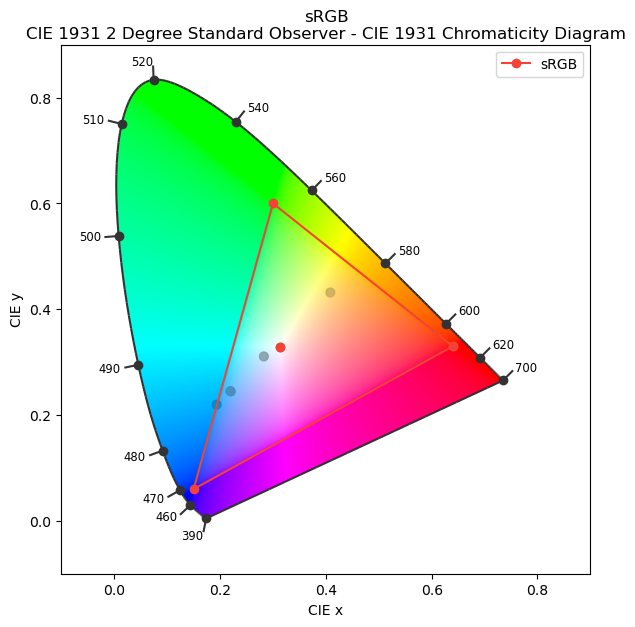

(<Figure size 640x640 with 1 Axes>,
 <AxesSubplot:title={'center':'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [4]:
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(rgb_list, c='black')